<a href="https://colab.research.google.com/github/yhlyyuu/ML/blob/main/HW1%20%E6%B3%A2%E5%A3%AB%E9%A0%93%E6%88%BF%E5%83%B9%E9%A0%90%E6%B8%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
# 載入波士頓房價資料集
(x_data, y_data), (_, _) = boston_housing.load_data()


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# 將資料分為訓練集(70%)、驗證集(15%)、測試集(15%)
x_train_val, x_test, y_train_val, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.1765, random_state=42)


In [4]:
print(f"訓練集大小: {len(x_train)} 樣本 ({len(x_train)/len(x_data)*100:.1f}%)")
print(f"驗證集大小: {len(x_val)} 樣本 ({len(x_val)/len(x_data)*100:.1f}%)")
print(f"測試集大小: {len(x_test)} 樣本 ({len(x_test)/len(x_data)*100:.1f}%)")


訓練集大小: 282 樣本 (69.8%)
驗證集大小: 61 樣本 (15.1%)
測試集大小: 61 樣本 (15.1%)


In [5]:
# 正規化資料
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)

x_train = (x_train - mean) / std
x_val = (x_val - mean) / std
x_test = (x_test - mean) / std

In [34]:
# 提前停止訓練的回調函數，避免過擬合
early_stopping = EarlyStopping(
    monitor='val_loss',  # 監控驗證集損失
    patience=20,         # 如果20個epoch內驗證損失沒有改善，則停止訓練
    restore_best_weights=True,  # 恢復具有最佳驗證損失的權重
    verbose=1            # 顯示停止訓練的訊息
)

# 4. 模型建立（含Dropout防止過擬合）
model = Sequential()
model.add(Input(shape=(x_train.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 256)            │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,361 (185.00 KB)

 Trainable params: 47,361 (185.00 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
epochs=100

# 訓練模型
history = model.fit(
    x_train, y_train,
    batch_size=8,
    epochs=epochs,
    validation_data=(x_val, y_val),  # 使用驗證集而非測試集進行訓練時驗證
    callbacks=[early_stopping],
    shuffle=True,
    verbose=1
)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - loss: 521.7189 - mae: 21.0896 - val_loss: 319.0399 - val_mae: 16.2111
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 179.8663 - mae: 11.0042 - val_loss: 62.8676 - val_mae: 6.5645
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 77.3102 - mae: 6.6805 - val_loss: 16.7723 - val_mae: 3.1844
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 75.0387 - mae: 6.3464 - val_loss: 13.6536 - val_mae: 2.7311
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 46.6633 - mae: 5.0113 - val_loss: 15.4332 - val_mae: 2.8935
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 47.0411 - mae: 5.2978 - val_loss: 16.6051 - val_mae: 3.0839
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 42.5721 - mae: 5.0635 - val_loss: 13.9633 - val_mae: 2.7626
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 36.6770 - mae: 4.6585 - val_loss: 15.2596 - val_mae: 2.9642
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step


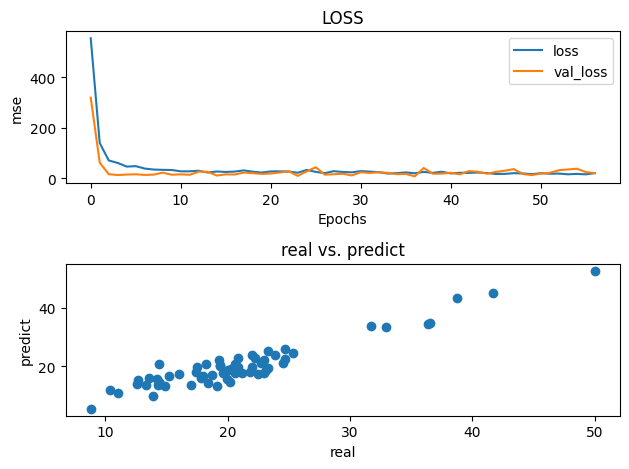

In [36]:
# 使用模型進行預測
y_pred = model.predict(x_test)

# Loss
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.title('LOSS')
plt.legend()

# 預測 vs. 真實值
plt.subplot(2, 1, 2)
plt.scatter(y_test, y_pred)
plt.xlabel('real')
plt.ylabel('predict')
plt.title('real vs. predict')

plt.tight_layout()
plt.show()

In [37]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.3f}')


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
R² Score: 0.871


In [ ]:
plt.plot(np.arange(epochs), history.history['mae'], c='b', label='train_mae')
plt.plot(np.arange(epochs), history.history['val_mae'], c='y', label='val_mae')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('mae')
plt.show()